In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('choclate.csv')

df.columns
# Remove $ and comma from Amount
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

df.head()

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [3]:
df = df.dropna()
df.columns = df.columns.str.strip()

df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [4]:
 df.columns


Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [6]:
df['Boxes Shipped'].sum()

540437

In [12]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)


print(country_sales)


Country
India          $7,896.00$4,501.00$5,376.00$168.00$2,443.00$6,...
UK             $5,320.00$13,685.00$13,685.00$4,704.00$1,085.0...
New Zealand    $3,990.00$168.00$8,379.00$9,492.00$5,061.00$1,...
USA            $3,703.00$3,017.00$1,267.00$4,753.00$4,025.00$...
Australia      $12,726.00$3,080.00$2,835.00$6,790.00$6,888.00...
Canada         $1,442.00$4,067.00$8,799.00$1,652.00$2,163.00$...
Name: Amount, dtype: object


In [17]:
Product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)


print(Product_sales)


Product
White Choc              $9,492.00$2,800.00$9,681.00$7,126.00$1,043.00$...
Milk Bars               $8,799.00$6,979.00$609.00$2,464.00$4,263.00$7,...
85% Dark Bars           $7,896.00$1,085.00$1,722.00$3,654.00$2,205.00$...
Almond Choco            $6,839.00$7,602.00$4,865.00$6,090.00$5,642.00$...
Organic Choco Syrup     $6,790.00$4,067.00$273.00$19,453.00$6,181.00$2...
70% Dark Bites          $5,859.00$126.00$10,927.00$6,048.00$4,018.00$3...
Smooth Sliky Salty      $5,376.00$4,704.00$3,017.00$5,929.00$5,103.00$...
Mint Chip Choco         $5,320.00$63.00$1,162.00$9,660.00$6,454.00$11,...
Manuka Honey Choco      $5,061.00$4,284.00$9,583.00$2,443.00$17,318.00...
Choco Coated Almonds    $4,781.00$12,313.00$2,093.00$9,324.00$4,333.00...
Peanut Butter Cubes     $4,501.00$12,726.00$13,685.00$8,379.00$6,790.0...
50% Dark Bites          $3,990.00$2,653.00$9,737.00$4,438.00$9,275.00$...
Orange Choco            $3,703.00$7,595.00$11,095.00$49.00$9,408.00$8,...
After Nines             $3,080

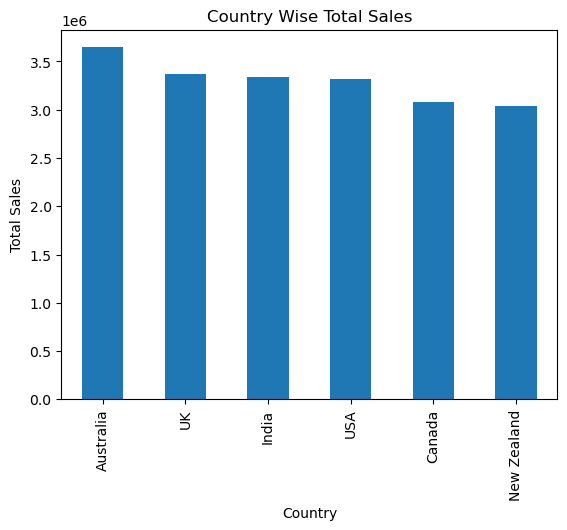

In [6]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure()
country_sales.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Country Wise Total Sales")
plt.show()


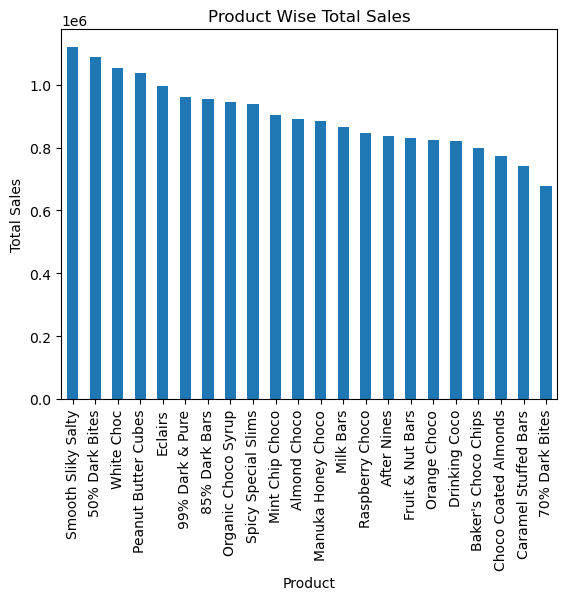

In [7]:
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure()
product_sales.plot(kind='bar')
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Product Wise Total Sales")
plt.show()


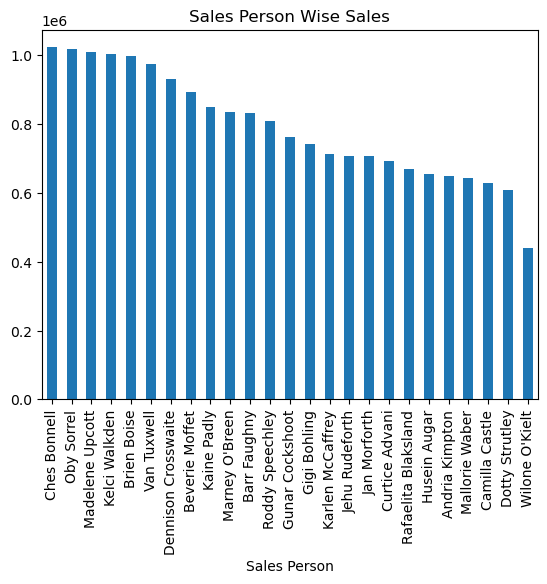

In [8]:
salesperson_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure()
salesperson_sales.plot(kind='bar')
plt.title("Sales Person Wise Sales")
plt.show()



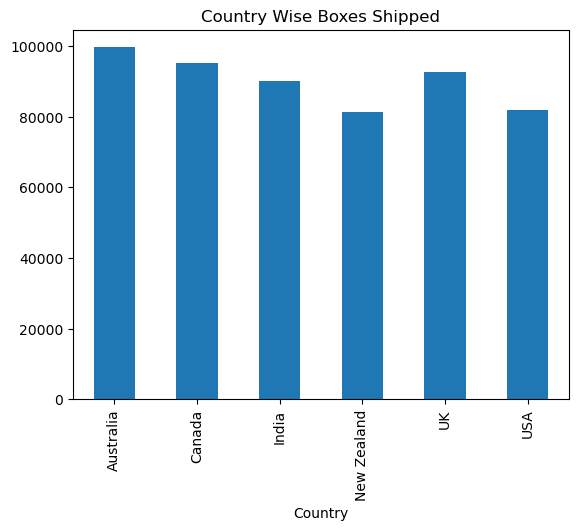

In [9]:
boxes_country = df.groupby('Country')['Boxes Shipped'].sum()

plt.figure()
boxes_country.plot(kind='bar')
plt.title("Country Wise Boxes Shipped")
plt.show()


In [11]:
df[['Amount', 'Boxes Shipped']].corr()



,Amount,Boxes Shipped
Amount,1.000000,-0.013154
Boxes Shipped,-0.013154,1.000000


In [13]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)


In [14]:
top5 = df.sort_values(by='Amount', ascending=False).head(5)

top5


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
2731,Ches Bonnell,India,Peanut Butter Cubes,27/01/2024,26170.95,224
1637,Ches Bonnell,India,Peanut Butter Cubes,27/01/2023,23251.68,210
2254,Van Tuxwell,Australia,Organic Choco Syrup,10/08/2024,22943.37,14
1229,Van Tuxwell,India,Organic Choco Syrup,16/05/2023,22751.18,182
2777,Curtice Advani,India,Smooth Sliky Salty,19/04/2024,22717.09,143


In [15]:
for index, row in top5.iterrows():
    print("Sales Person:", row['Sales Person'])
    print("Country:", row['Country'])
    print("Product:", row['Product'])
    print("Amount:", row['Amount'])
    print("---------------------------")


Sales Person: Ches Bonnell
Country: India
Product: Peanut Butter Cubes
Amount: 26170.95
---------------------------
Sales Person: Ches Bonnell
Country: India
Product: Peanut Butter Cubes
Amount: 23251.68
---------------------------
Sales Person: Van Tuxwell
Country: Australia
Product: Organic Choco Syrup
Amount: 22943.37
---------------------------
Sales Person: Van Tuxwell
Country: India
Product: Organic Choco Syrup
Amount: 22751.18
---------------------------
Sales Person: Curtice Advani
Country: India
Product: Smooth Sliky Salty
Amount: 22717.09
---------------------------


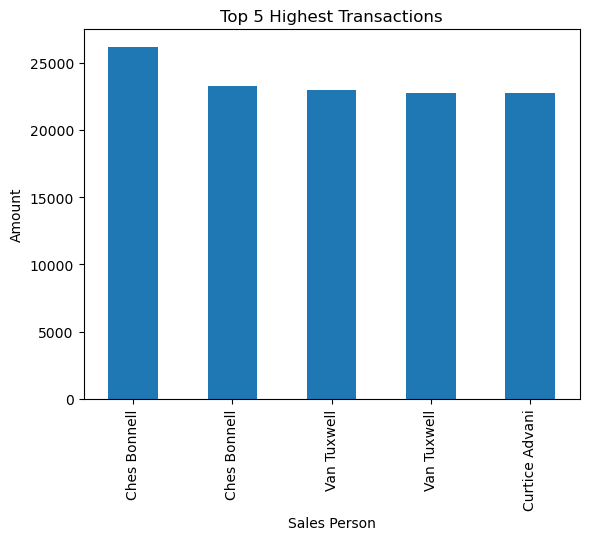

In [16]:
plt.figure()
top5.set_index('Sales Person')['Amount'].plot(kind='bar')
plt.title("Top 5 Highest Transactions")
plt.ylabel("Amount")
plt.show()
